In [137]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [138]:
academic = pd.read_csv("Stu_processed.csv")
money = pd.read_csv("Financial_processed.csv")

In [139]:
print(academic.shape)


(1789, 14)


In [140]:
academic.head()

,ID,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,id
0,18000007,2.3,2.23,ECO 110,Microeconomics,23,88.89,2,1,5,92126,32.908449,-117.14138,76
1,18000007,1.0,2.23,INT 110,Critical Reasoning,23,50.00,2,1,5,92126,32.908449,-117.14138,29
2,18000007,2.3,2.23,WRI 100,College Composition I,23,55.81,2,1,5,92126,32.908449,-117.14138,10
3,18000007,3.3,2.23,MTH 100,College Algebra,23,60.00,2,1,5,92126,32.908449,-117.14138,57
4,18000007,3.7,2.25,MGT 315,Organizational Behavior,23,59.18,2,1,5,92126,32.908449,-117.14138,41


In [141]:
#select datapoints
stu = academic[['ID', "Term_GPA", 'Age', 'Attendance', \
                 'Gender','Latino', 'Race', ]].copy()
stu.head()

,ID,Term_GPA,Age,Attendance,Gender,Latino,Race
0,18000007,2.23,23,88.89,2,1,5
1,18000007,2.23,23,50.00,2,1,5
2,18000007,2.23,23,55.81,2,1,5
3,18000007,2.23,23,60.00,2,1,5
4,18000007,2.25,23,59.18,2,1,5


In [142]:
print(money.shape)


(366, 7)


In [143]:
money.head()

,ID,Grants,Loans,Federal,Institutional,Net_Total,YearBegin
0,2016000026,13490.5,5500.0,7333.0,10657.5,18934.5,1970-01-01 00:00:00.000002016
1,AC2802324,18065.5,7500.0,11183.0,14382.5,25487.5,1970-01-01 00:00:00.000002016
2,2016000037,11700.0,6500.0,6500.0,11700.0,18132.0,1970-01-01 00:00:00.000002016
3,2016000055,6000.0,5500.0,5500.0,6000.0,11444.0,1970-01-01 00:00:00.000002016
4,AR7969044,14745.5,6500.0,9383.0,11862.5,21177.5,1970-01-01 00:00:00.000002016


In [144]:
dfM = money.drop(['Grants', 'Net_Total','Federal', 'YearBegin'], axis=1)

In [145]:
dfM.head()

,ID,Loans,Institutional
0,2016000026,5500.0,10657.5
1,AC2802324,7500.0,14382.5
2,2016000037,6500.0,11700.0
3,2016000055,5500.0,6000.0
4,AR7969044,6500.0,11862.5


In [146]:
stu.head()

,ID,Term_GPA,Age,Attendance,Gender,Latino,Race
0,18000007,2.23,23,88.89,2,1,5
1,18000007,2.23,23,50.00,2,1,5
2,18000007,2.23,23,55.81,2,1,5
3,18000007,2.23,23,60.00,2,1,5
4,18000007,2.25,23,59.18,2,1,5


In [147]:
print(stu.shape)

(1789, 7)


In [148]:
stu.Term_GPA.describe()

count    1789.000000
mean        2.772493
std         0.760508
min         0.300000
25%         2.330000
50%         2.820000
75%         3.340000
max         4.000000
Name: Term_GPA, dtype: float64

In [149]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Skewness is:  -0.639616552867032


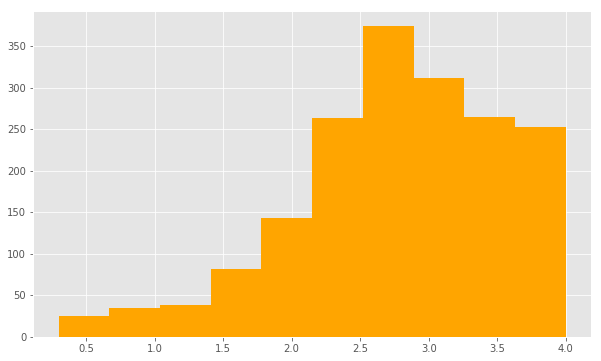

In [150]:
# Skewness
print("Skewness is: ", stu.Term_GPA.skew())
plt.hist(stu.Term_GPA, color='orange')
plt.show()

In [151]:
# merge_table = pd.merge(stu, dfM, on="ID", how="outer")
# merge_table

In [152]:
stu.drop(columns = 'ID', axis=1, inplace=True)
stu.head()

,Term_GPA,Age,Attendance,Gender,Latino,Race
0,2.23,23,88.89,2,1,5
1,2.23,23,50.00,2,1,5
2,2.23,23,55.81,2,1,5
3,2.23,23,60.00,2,1,5
4,2.25,23,59.18,2,1,5


In [153]:
print(stu.shape)

(1789, 6)


In [154]:
X = stu[["Age", 'Attendance', "Gender"]]
y = stu["Term_GPA"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1789, 3) (1789, 1)


In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [159]:
X, y = make_blobs(centers=3, random_state=42)

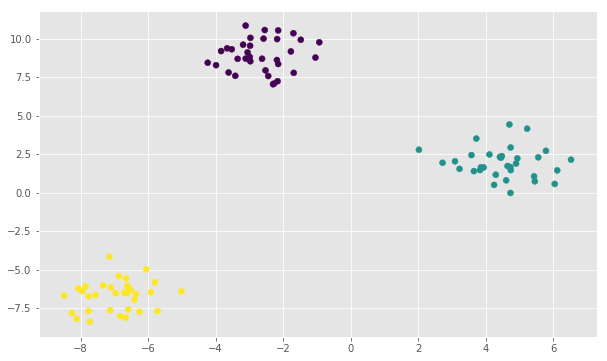

In [160]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)